In [1]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Datacamp Pyspark Tutorial")\
.config("spark.memory.offHeap.enabled","true")\
.config("spark.memory.offHeap.size","10g")\
.getOrCreate()

In [3]:
df =spark.read.csv('./Data/commerce_data.csv',header=True,escape="\"")
df.show(5,0)

+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/2010 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/2010 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------

In [4]:
df.show(5,2)
df.summary()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|       53|       85|         WH|       6|         12|       2.|        17|     Un|
|       53|       71|         WH|       6|         12|       3.|        17|     Un|
|       53|       84|         CR|       8|         12|       2.|        17|     Un|
|       53|       84|         KN|       6|         12|       3.|        17|     Un|
|       53|       84|         RE|       6|         12|       3.|        17|     Un|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
only showing top 5 rows



DataFrame[summary: string, InvoiceNo: string, StockCode: string, Description: string, Quantity: string, InvoiceDate: string, UnitPrice: string, CustomerID: string, Country: string]

In [5]:
df.count()

541909

In [6]:
df.select('CustomerID').distinct().count()

4373

In [7]:
from pyspark.sql.functions import *
from pyspark.sql.types import *


df.groupBy("Country").agg(countDistinct('CustomerID').alias('Country_count')).orderBy(desc("Country_count")).show()

+---------------+-------------+
|        Country|Country_count|
+---------------+-------------+
| United Kingdom|         3950|
|        Germany|           95|
|         France|           87|
|          Spain|           31|
|        Belgium|           25|
|    Switzerland|           21|
|       Portugal|           19|
|          Italy|           15|
|        Finland|           12|
|        Austria|           11|
|         Norway|           10|
|        Denmark|            9|
|Channel Islands|            9|
|      Australia|            9|
|    Netherlands|            9|
|         Sweden|            8|
|         Cyprus|            8|
|          Japan|            8|
|         Poland|            6|
|         Greece|            4|
+---------------+-------------+
only showing top 20 rows



In [26]:
df=df.dropna(subset=['CustomerID','InvoiceDate'])

In [29]:
df.select(max("InvoiceDate")).show()
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df2=df.withColumn('date',to_timestamp("InvoiceDate",'MM/dd/yyyy HH:mm'))
df2.select(max("date").alias("Latest date")).show()
df2.select(min(df2.date).alias("Earliest date")).show()

+----------------+
|max(InvoiceDate)|
+----------------+
|   9/9/2011 9:52|
+----------------+

+-------------------+
|        Latest date|
+-------------------+
|2011-12-09 12:50:00|
+-------------------+

+-------------------+
|      Earliest date|
+-------------------+
|2010-12-01 08:26:00|
+-------------------+



In [30]:
df2.filter(isnull(df2.date)).show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+----+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|date|
+---------+---------+-----------+--------+-----------+---------+----------+-------+----+
+---------+---------+-----------+--------+-----------+---------+----------+-------+----+



In [33]:
df2.select('InvoiceDate','date').orderBy(desc('date')).show()

+---------------+-------------------+
|    InvoiceDate|               date|
+---------------+-------------------+
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:50|2011-12-09 12:50:00|
|12/9/2011 12:49|2011-12-09 12:49:00|
|12/9/2011 12:49|2011-12-09 12:49:00|
|12/9/2011 12:49|2011-12-09 12:49:00|
|12/9/2011 12:49|2011-12-09 12:49:00|
|12/9/2011 12:31|2011-12-09 12:31:00|
+---------------+-------------------+
only showing top 20 rows



In [34]:

df2.filter(col('date').isNotNull()).select('date').distinct().orderBy(df2.date).show()

+-------------------+
|               date|
+-------------------+
|2010-12-01 08:26:00|
|2010-12-01 08:28:00|
|2010-12-01 08:34:00|
|2010-12-01 08:35:00|
|2010-12-01 08:45:00|
|2010-12-01 09:00:00|
|2010-12-01 09:01:00|
|2010-12-01 09:02:00|
|2010-12-01 09:09:00|
|2010-12-01 09:32:00|
|2010-12-01 09:34:00|
|2010-12-01 09:37:00|
|2010-12-01 09:41:00|
|2010-12-01 09:45:00|
|2010-12-01 09:49:00|
|2010-12-01 09:53:00|
|2010-12-01 09:56:00|
|2010-12-01 09:57:00|
|2010-12-01 09:58:00|
|2010-12-01 09:59:00|
+-------------------+
only showing top 20 rows



In [35]:
data=df2.select(min(df2.date).alias("Earliest_date")).collect()[0][0]
df2=df2.withColumn('from_date',lit(data))\
    .withColumn('Recency',col("date").cast("long")-col("from_date").cast("long"))
df2.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|Recency|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United 

In [36]:
#@df2=df2.join(df2.groupBy('CustomerID',).agg(max('Recency').alias('Recency')),on='Recency',how='leftsemi')
df_recency=df2.groupBy('CustomerID','InvoiceNo').agg(max('Recency').alias('Recency'))
print(df2.count())
df_recency.show()

406829
+----------+---------+-------+
|CustomerID|InvoiceNo|Recency|
+----------+---------+-------+
|     18074|   536384|   5220|
|     17381|   536736| 102780|
|     17460|   536781| 110880|
|     16926|   536972| 191760|
|     17720|   537469| 526620|
|     12471|   538175| 782520|
|     13209|  C539273|1321440|
|     16684|   539489|1646100|
|     12971|   539675|1736700|
|     12734|   539829|1830060|
|     15358|  C539857|1838820|
|     16422|   540383|3144060|
|     13047|   536368|    480|
|     17850|   536787| 111480|
|     12748|   537140| 361620|
|     17675|  C537611| 536340|
|     13769|   537612| 536520|
|     12494|   537967| 702300|
|     17757|   538361| 807000|
|     16011|   538504| 966900|
+----------+---------+-------+
only showing top 20 rows



In [37]:
df2.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|Recency|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United 

In [38]:
df_freq=df2.groupBy('CustomerID').agg(count('InvoiceNo').alias('Frequency'))
df_freq.show()

+----------+---------+
|CustomerID|Frequency|
+----------+---------+
|     16250|       24|
|     15574|      168|
|     15555|      925|
|     15271|      275|
|     17757|      742|
|     17551|       43|
|     13187|       37|
|     16549|      981|
|     14525|      298|
|     18283|      756|
|     13174|      314|
|     13027|       26|
|     12957|      244|
|     17128|       14|
|     14810|      255|
|     16654|       31|
|     17491|      110|
|     17917|       94|
|     14639|      175|
|     17375|       71|
+----------+---------+
only showing top 20 rows



In [39]:
df2=df2.join(df_freq,on='CustomerID',how='left')
df2.show()

+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+
|CustomerID|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|Recency|Frequency|
+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+
|     17850|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|
|     17850|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|
|     17850|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|
|     17850|   536365|   84029G|KN

In [40]:
df2=df2.withColumn("Total Amount",col("Quantity")*col("UnitPrice"))
df2.show()

+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+
|CustomerID|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|Recency|Frequency|      Total Amount|
+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+
|     17850|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|15.299999999999999|
|     17850|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|             20.34|
|     17850|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|United Kingdo

In [41]:
Df_tA=df2.groupBy('CustomerID').agg(sum("Total Amount").alias("Monetary_value"))
Df_tA.show()

+----------+------------------+
|CustomerID|    Monetary_value|
+----------+------------------+
|     16250|            389.44|
|     15574| 702.2500000000002|
|     15555| 4758.200000000001|
|     15271|2485.8199999999997|
|     17757|           5585.49|
|     17551|            306.84|
|     13187|236.01999999999995|
|     16549|           4154.64|
|     14525| 4221.370000000001|
|     18283|2094.8800000000006|
|     13174|           2817.03|
|     13027|            6912.0|
|     12957|3979.0400000000004|
|     17128|            157.09|
|     14810|           2087.88|
|     16654|            594.97|
|     17491|           3541.92|
|     17917|            341.28|
|     14639|2952.3399999999997|
|     17375|             372.5|
+----------+------------------+
only showing top 20 rows



In [42]:
df2=df2.join(Df_tA,on='CustomerID',how='left')
df2.show()

+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+------------------+
|CustomerID|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|Recency|Frequency|      Total Amount|    Monetary_value|
+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+------------------+
|     17850|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|15.299999999999999| 5288.630000000009|
|     17850|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|             20.34| 5288.630000000009|
|    

In [43]:
df2.groupBy("CustomerID").agg(max("Recency"),max("Frequency"),max("Monetary_value")).show()

+----------+------------+--------------+-------------------+
|CustomerID|max(Recency)|max(Frequency)|max(Monetary_value)|
+----------+------------+--------------+-------------------+
|     16250|     9700860|            24|             389.44|
|     15574|    16947300|           168|  702.2500000000002|
|     15555|    31218780|           925|  4758.200000000001|
|     15271|    31643100|           275| 2485.8199999999997|
|     17757|    32166300|           742|            5585.49|
|     17551|     1230360|            43|             306.84|
|     13187|     3148260|            37| 236.01999999999995|
|     16549|    31387200|           981|            4154.64|
|     14525|    31537620|           298|  4221.370000000001|
|     18283|    31980960|           756| 2094.8800000000006|
|     13174|    30866940|           314|            2817.03|
|     13027|    22468380|            26|             6912.0|
|     12957|    31910760|           244| 3979.0400000000004|
|     17128|     3382560

In [44]:
df2.groupBy("CustomerID").agg(first("Recency"),first("Frequency"),first("Monetary_value")).show()

+----------+--------------+----------------+---------------------+
|CustomerID|first(Recency)|first(Frequency)|first(Monetary_value)|
+----------+--------------+----------------+---------------------+
|     16250|          5580|              24|               389.44|
|     15574|        112800|             168|    702.2500000000002|
|     15555|        368340|             925|    4758.200000000001|
|     15271|        710460|             275|   2485.8199999999997|
|     17757|        118260|             742|              5585.49|
|     17551|       1230360|              43|               306.84|
|     13187|       3148260|              37|   236.01999999999995|
|     16549|       3389820|             981|              4154.64|
|     14525|       1070040|             298|    4221.370000000001|
|     18283|       3131280|             756|   2094.8800000000006|
|     13174|        374280|             314|              2817.03|
|     13027|       1657140|              26|               691

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

'''VectorAssembler will throw error in transform or next step if the inputCols have null in it'''
assemble=VectorAssembler(inputCols=[
    'Recency','Frequency','Monetary_value'
], outputCol='features') 



In [46]:
df2.filter(isnull(df2.Frequency)).show()

+----------+---------+---------+-----------+--------+-----------+---------+-------+----+---------+-------+---------+------------+--------------+
|CustomerID|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|Country|date|from_date|Recency|Frequency|Total Amount|Monetary_value|
+----------+---------+---------+-----------+--------+-----------+---------+-------+----+---------+-------+---------+------------+--------------+
+----------+---------+---------+-----------+--------+-----------+---------+-------+----+---------+-------+---------+------------+--------------+



In [47]:
assembled_data=assemble.transform(df2)
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

In [48]:
data_scale_output.select('standardized').show(2,truncate=False)

+---------------------------------------------+
|standardized                                 |
+---------------------------------------------+
|[0.0,0.21198446917468605,0.17544148433207393]|
|[0.0,0.21198446917468605,0.17544148433207393]|
+---------------------------------------------+
only showing top 2 rows



In [54]:
data_scale_output.show()

+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+------------------+--------------------+--------------------+
|CustomerID|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|Recency|Frequency|      Total Amount|    Monetary_value|            features|        standardized|
+----------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+------------------+--------------------+--------------------+
|     17850|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|      312|15.299999999999999| 5288.630000000009|[0.0,312.0,5288.6...|[0.0,0.2119844691...|
|     17850|   536365|    71053| WHI

In [49]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

In [50]:
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')
cost = np.zeros(10)

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

               0
0  899850.542369
1  405135.143091
2  357577.322739
3  235353.683910
4  212344.815395
5  159815.367520
6  132434.212724
7   99764.023022
            cost
0  899850.542369
1  405135.143091
2  357577.322739
3  235353.683910
4  212344.815395
5  159815.367520
6  132434.212724
7   99764.023022
   cluster           cost
0        2  899850.542369
1        3  405135.143091
2        4  357577.322739
3        5  235353.683910
4        6  212344.815395
5        7  159815.367520
6        8  132434.212724
7        9   99764.023022


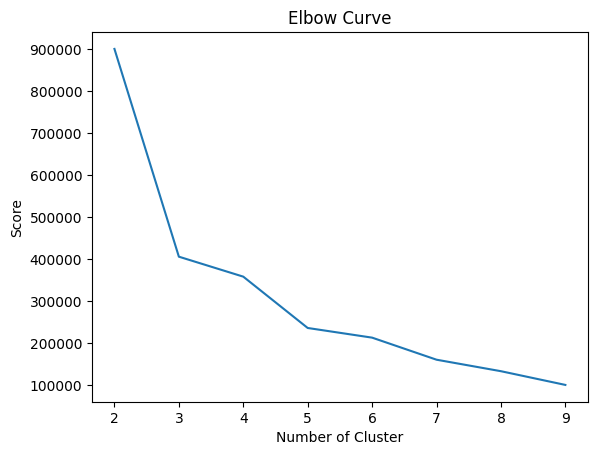

In [52]:
import pandas as pd
import pylab as pl
df_cost=pd.DataFrame(cost[2:])
print(df_cost)
df_cost.columns=["cost"]
print(df_cost)
new_col=range(2,10)
df_cost.insert(0,'cluster',new_col)
print(df_cost)
pl.plot(df_cost.cluster,df_cost.cost)
pl.xlabel("Number of Cluster")
pl.ylabel('Score')
pl.title("Elbow Curve")
pl.show()

In [53]:
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)
preds=KMeans_fit.transform(data_scale_output)
preds.show(5,0)

+----------+---------+---------+-----------------------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+-----------------+-----------------------------+---------------------------------------------+----------+
|CustomerID|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|Country       |date               |from_date          |Recency|Frequency|Total Amount      |Monetary_value   |features                     |standardized                                 |prediction|
+----------+---------+---------+-----------------------------------+--------+--------------+---------+--------------+-------------------+-------------------+-------+---------+------------------+-----------------+-----------------------------+---------------------------------------------+----------+
|17850     |536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/2010 8:26|2.55    

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz=preds.select('Recency','Frequency','Monetary_value','prediction')
df_viz=df_viz.toPandas()
avg_df=df_viz.groupby(['prediction'],as_index=False).mean()

print(avg_df)

   prediction       Recency    Frequency  Monetary_value
0           0  2.804639e+07   279.550892     4011.116167
1           1  5.547636e+06   343.619730     5825.944263
2           2  2.194076e+07  5155.037962    87207.540672
3           3  1.683033e+07   321.324677     5307.947818


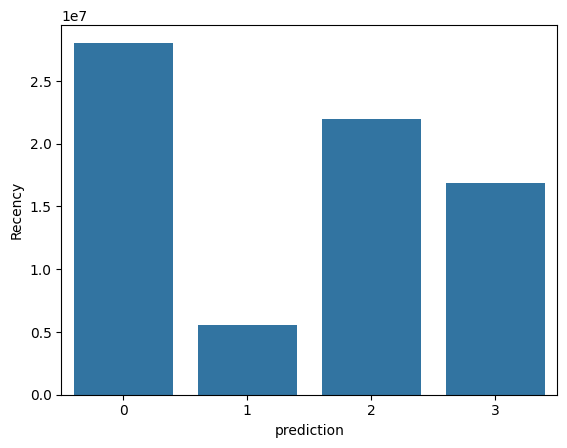

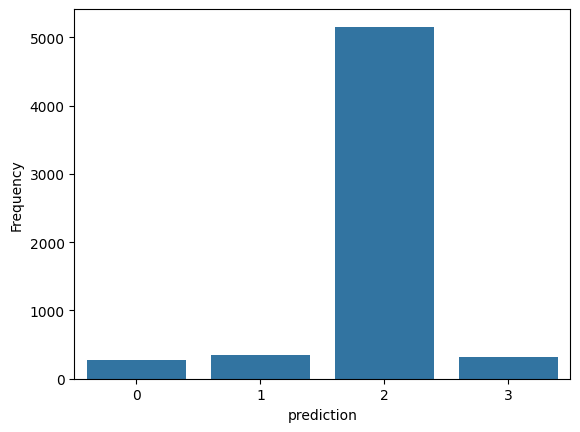

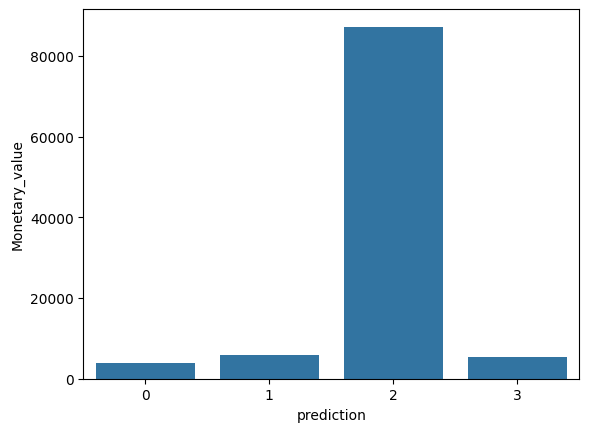

In [59]:
list= ['Recency','Frequency','Monetary_value']

for i in list:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()